In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sqlite3
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
database_filepath = "./accident_data_v1.0.0_2023.db"

In [4]:
query = """SELECT * FROM accident WHERE accident_year = 2020;"""

In [5]:
df = None
with sqlite3.connect(database_filepath) as conn:
    cursor = conn.cursor()
    df = pd.read_sql_query(query, conn)
    

df = df.loc[:, ~df.columns.duplicated()]
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


## 1. Are there significant hours of day, and days of the week, on which accidents occur?

In [6]:
df['hourly'] = pd.to_datetime(df['time']).dt.hour
df['hourly']

0         9
1        13
2         1
3         1
4         2
         ..
91194    14
91195    15
91196    12
91197    14
91198    13
Name: hourly, Length: 91199, dtype: int32

#### 1.1 Hours of the day

In [7]:
def plot_accident_by_hours_of_day(df: pd.DataFrame):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x='hourly', palette='crest')
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 0.5,
            int(bar.get_height()),
            ha = 'center',
            va = 'bottom',
            fontsize=8,
        )
    plt.title('Accidents by Hours of the Day')
    plt.xlabel('Hours from Midnight')
    plt.ylabel('Number of Accidents')
    plt.show()

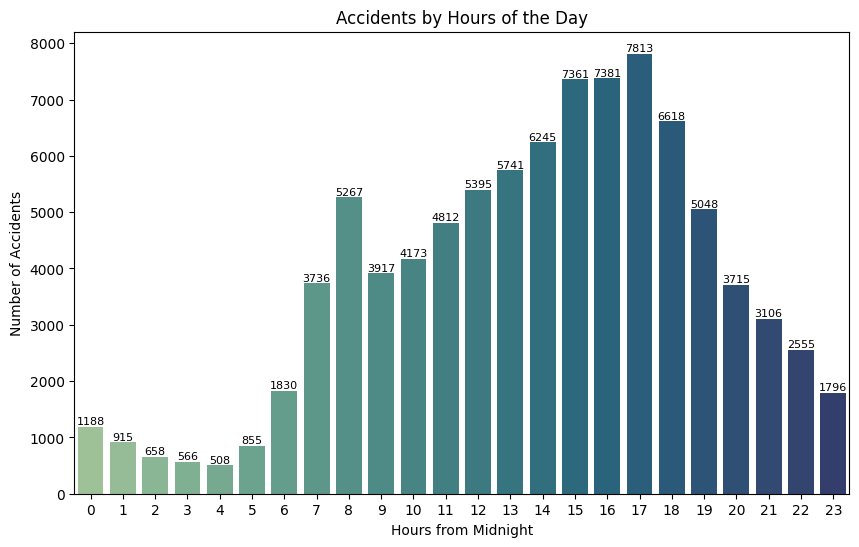

In [8]:
plot_accident_by_hours_of_day(df)

#### 1.2 Days of the week

In [9]:
def plot_accident_by_day_of_week(df: pd.DataFrame):
    # Plot accidents by day of the week
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x='day_of_week', palette='magma')
    ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, # Center of the bar
            bar.get_height() + 0.5, # Slightly above the top of the bar
            int(bar.get_height()), # Display the ount
            ha = 'center', # Horizontal alignment
            va = 'bottom' # Vertical alighnment
        )
    plt.title('Accidents by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.show()

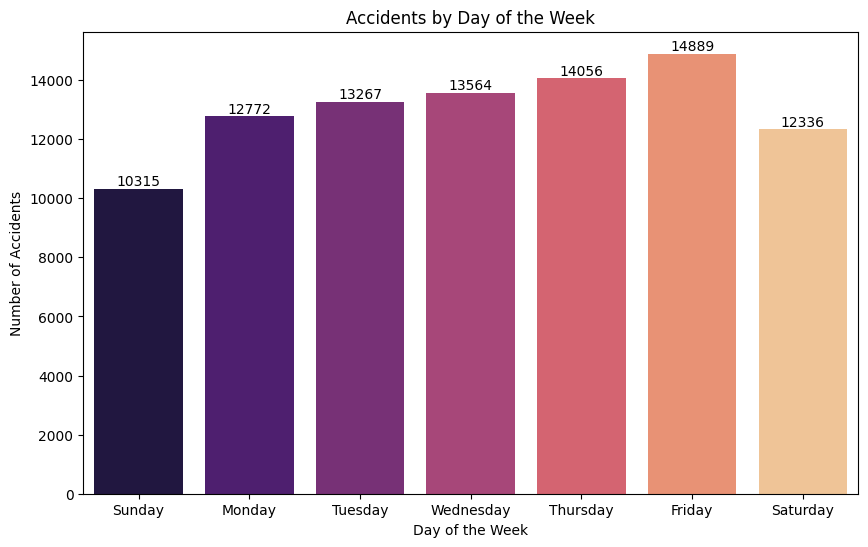

In [10]:
plot_accident_by_day_of_week(df)

## 2. For mototbikes, are there significant hours of the day, and days of week, on which accidents occur? We suggest a focus on: Motorcycle 125c

In [11]:
query = """
            SELECT vehicle.*, accident.day_of_week, accident.time
            FROM vehicle
            LEFT JOIN accident
            ON accident.accident_index = vehicle.accident_index
            WHERE vehicle.accident_year = 2020
        """
df_vehicle = None
with sqlite3.connect(database_filepath) as conn:
    cursor = conn.cursor()
    df_vehicle = pd.read_sql_query(query, conn)
    cursor.close()

df_vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,day_of_week,time
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,32,6,1968,2,6,AUDI Q5,4,1,3,09:00
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,45,7,1395,1,2,AUDI A1,7,1,2,13:55
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,4,01:25
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,44,7,1798,8,8,TOYOTA PRIUS,2,1,4,01:50
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,20,4,2993,2,4,BMW 4 SERIES,-1,-1,4,02:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,57,9,1968,2,2,AUDI A5,7,1,4,12:42
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2,4,12:42
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,68,10,1995,2,1,BMW X3,5,1,3,14:00
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,76,11,-1,-1,-1,-1,9,1,3,14:00


In [12]:
df_vehicle.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [13]:
"""
    3 = Motorcycle 125cc and under
    4 = Motorcycle over 125cc and up to 500cc
    5 = Motorcycle over 500cc
"""
df_motorcycle = df_vehicle.loc[df_vehicle['vehicle_type'].isin([3, 4, 5])]
df_motorcycle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,day_of_week,time
12,681728,2020010228020,2020,010228020,1,3,0,3,7,3,...,37,7,114,1,5,YAMAHA XC115,8,1,4,03:25
33,681749,2020010228086,2020,010228086,1,3,0,18,7,3,...,-1,-1,-1,-1,-1,-1,-1,-1,4,14:00
36,681752,2020010228097,2020,010228097,2,3,0,18,1,5,...,20,4,125,1,4,PEUGEOT TWEET 125,6,1,4,14:37
58,681774,2020010228148,2020,010228148,1,3,0,14,5,1,...,20,4,125,1,0,HONDA GLR 125,2,1,4,19:05
77,681793,2020010228207,2020,010228207,1,3,0,99,9,9,...,22,5,125,1,9,HONDA WW125,7,1,4,14:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167195,848911,2020991010130,2020,991010130,2,3,0,14,7,3,...,47,8,124,1,17,-1,5,1,5,16:30
167292,849008,2020991011809,2020,991011809,2,3,0,5,7,3,...,61,9,124,1,4,-1,3,1,4,17:30
167301,849017,2020991012311,2020,991012311,1,3,0,18,8,4,...,35,6,125,1,3,-1,5,1,2,17:55
167304,849020,2020991012353,2020,991012353,2,4,0,18,6,2,...,48,8,250,1,5,-1,2,1,5,15:45


In [14]:
df_motorcycle.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [15]:
df_motorcycle['hourly'] = pd.to_datetime(df_motorcycle['time']).dt.hour

In [16]:
df_motorcycle['hourly']

12         3
33        14
36        14
58        19
77        14
          ..
167195    16
167292    17
167301    17
167304    15
167371    12
Name: hourly, Length: 12998, dtype: int32

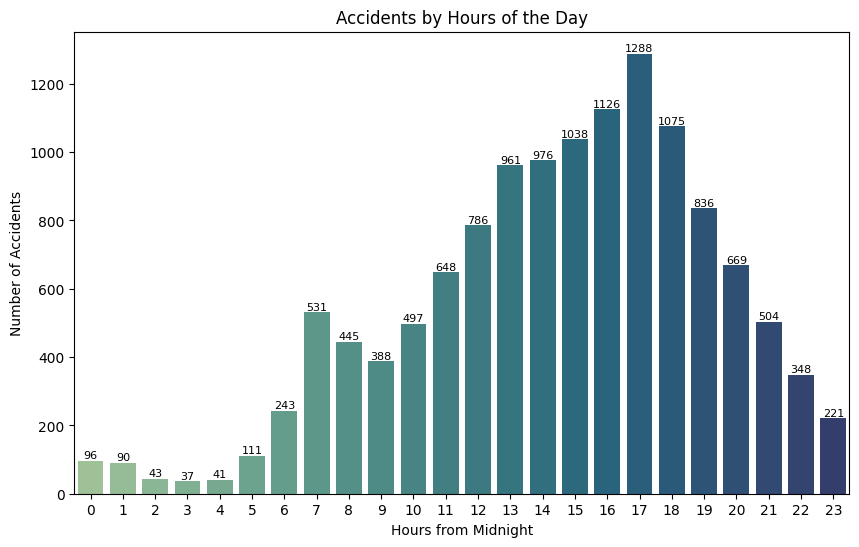

In [17]:
plot_accident_by_hours_of_day(df_motorcycle)

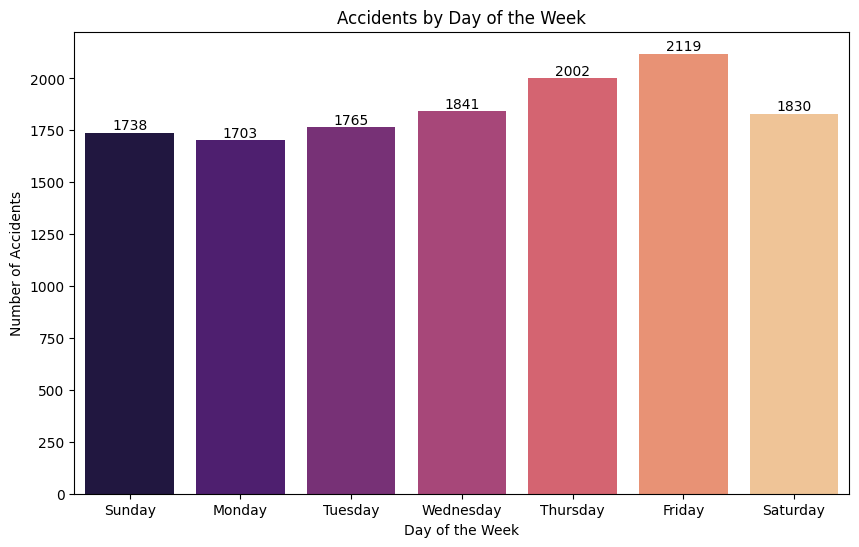

In [18]:
plot_accident_by_day_of_week(df_motorcycle)

## 3. Pedestrians in accident

In [19]:
query = """
        SELECT casualty.*, accident.time, accident.day_of_week
        FROM casualty
        LEFT JOIN accident
        ON accident.accident_index = casualty.accident_index
        WHERE casualty.accident_year = 2020;
        """
df_casualty = None
with sqlite3.connect(database_filepath) as conn:
    df_casualty = pd.read_sql_query(query, conn)

df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,time,day_of_week
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,...,9,5,0,0,0,0,1,4,09:00,3
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,...,1,1,0,0,0,0,1,2,13:55,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,...,1,1,0,0,0,0,1,2,13:55,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,...,5,9,0,0,0,0,1,3,01:25,4
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,...,4,1,0,0,0,0,1,3,01:50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,...,0,0,0,0,0,1,1,2,14:30,4
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,...,10,1,0,0,0,0,1,10,15:05,6
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,...,0,0,0,0,0,5,2,9,12:42,4
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,...,0,0,0,0,0,1,1,9,14:00,3


In [20]:
df_casualty['hourly'] = pd.to_datetime(df_casualty['time']).dt.hour

In [21]:
df_pedestrian = df_casualty.loc[df_casualty['casualty_class'] == 3]
df_pedestrian

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,time,day_of_week,hourly
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,...,5,0,0,0,0,1,4,09:00,3,9
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,...,1,0,0,0,0,1,2,13:55,2,13
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,...,1,0,0,0,0,1,2,13:55,2,13
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,...,9,0,0,0,0,1,3,01:25,4,1
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,...,1,0,0,0,0,1,3,01:50,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115573,600321,2020991023621,2020,991023621,1,2,3,2,54,8,...,1,0,0,0,0,1,4,10:30,3,10
115574,600322,2020991023880,2020,991023880,1,1,3,2,58,9,...,1,0,0,0,0,1,4,17:00,2,17
115578,600326,2020991024526,2020,991024526,1,1,3,1,69,10,...,9,0,0,0,0,3,7,12:00,3,12
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,...,1,0,0,0,0,1,10,15:05,6,15


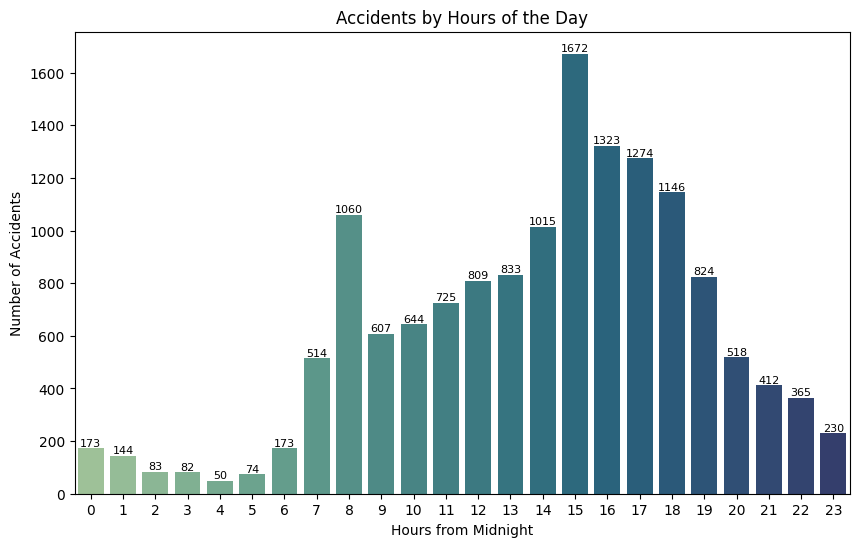

In [22]:
plot_accident_by_hours_of_day(df_pedestrian)

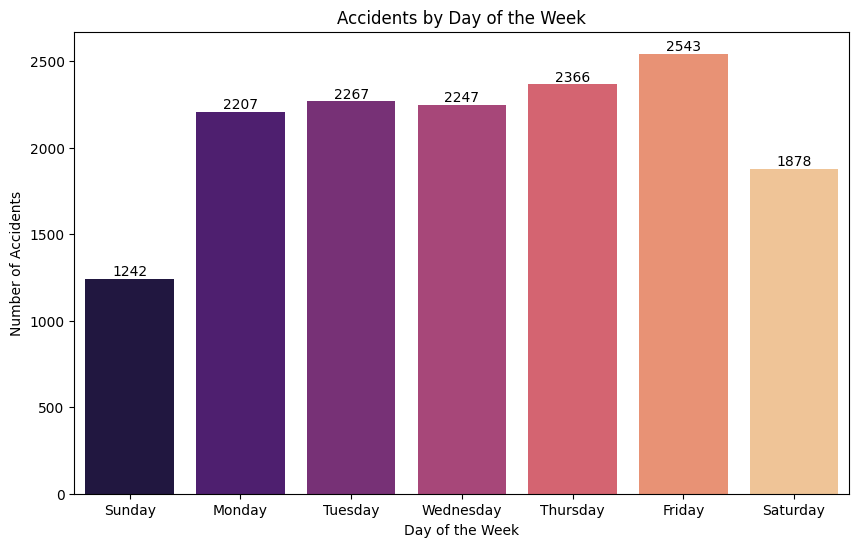

In [23]:
plot_accident_by_day_of_week(df_pedestrian)

## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
query = """
    SELECT *
    FROM accident AS a
    JOIN casualty AS c ON a.accident_index = c.accident_index
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020;
"""

In [26]:
df = None
with sqlite3.connect(database_filepath) as conn:
    df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.columns.duplicated()]
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
220431,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
220433,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [27]:
col_names = ['accident_severity', 'speed_limit', 'weather_conditions', 'road_type',
    'light_conditions', 'road_surface_conditions', 'junction_detail',
    'junction_control', 'urban_or_rural_area', 'number_of_vehicles',
    'number_of_casualties', 'day_of_week',
    'pedestrian_crossing_human_control', 
    'pedestrian_crossing_physical_facilities', 
    'vehicle_type', 'age_band_of_driver', 'age_of_vehicle', 'vehicle_manoeuvre',
    'casualty_class', 'sex_of_casualty', 'sex_of_driver', 'age_band_of_casualty', 
    'casualty_type', 'car_passenger', 'casualty_home_area_type', 
    'pedestrian_movement', 'pedestrian_location', 'first_point_of_impact']

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def iterative_impute(df):

    # Collecting all numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # Replace -1 with NaN
    df[numeric_cols] = df[numeric_cols].replace(-1, float('NaN'))
    
    # Initialize KNN Imputer
    imputer = IterativeImputer(max_iter=10, random_state=24)
    
    # Perform imputation only on specified columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    return df

# Example usage:
# Assuming 'data' is your DataFrame and 'columns_to_impute' is a list of column names
# updated_df = knn_impute(data, columns_to_impute)

In [29]:
df_updated = iterative_impute(df)
df_updated

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020.0,010219808,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,...,6.0,2.0,32.000000,6.000000,1968.000000,2.000000,6.000000,AUDI Q5,4.000000,1.000000
1,2020010220496,2020.0,010220496,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,...,2.0,1.0,45.000000,7.000000,1395.000000,1.000000,2.000000,AUDI A1,7.000000,1.000000
2,2020010220496,2020.0,010220496,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,...,2.0,1.0,45.000000,7.000000,1395.000000,1.000000,2.000000,AUDI A1,7.000000,1.000000
3,2020010228005,2020.0,010228005,526432.0,182761.0,-0.178719,51.529614,1.0,3.0,1.0,...,6.0,3.0,38.733391,6.809342,1609.756663,1.744613,8.125092,-1,4.225357,1.125698
4,2020010228006,2020.0,010228006,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,...,1.0,1.0,44.000000,7.000000,1798.000000,8.000000,8.000000,TOYOTA PRIUS,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020.0,991030297,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,...,1.0,1.0,57.000000,9.000000,1968.000000,2.000000,2.000000,AUDI A5,7.000000,1.000000
220431,2020991030297,2020.0,991030297,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,...,5.0,1.0,38.000000,7.000000,1301.000000,1.000000,2.000000,KTM 1290 SUPERDUKE,9.000000,2.000000
220432,2020991030900,2020.0,991030900,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,...,6.0,2.0,68.000000,10.000000,1995.000000,2.000000,1.000000,BMW X3,5.000000,1.000000
220433,2020991030900,2020.0,991030900,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,...,6.0,1.0,76.000000,11.000000,1337.799601,1.591708,7.519438,-1,9.000000,1.000000


In [30]:
# Define the age range bins and labels
bins = list(range(0, 110, 10))  # Creating bins in 10-year increments
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Add the new column 'age_range_of_vehicle'
# If age_of_vehicle is -1, set the age range to '-1', otherwise assign range
df['age_range_of_vehicle'] = df['age_of_vehicle'].apply(
    lambda x: '-1' if x == -1 else pd.cut([x], bins=bins, labels=labels, right=False)[0]
)

# Display the dataframe
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,age_range_of_vehicle
0,2020010219808,2020.0,010219808,521389.0,175144.0,-0.254001,51.462262,1.0,3.0,1.0,...,2.0,32.000000,6.000000,1968.000000,2.000000,6.000000,AUDI Q5,4.000000,1.000000,0-9
1,2020010220496,2020.0,010220496,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,...,1.0,45.000000,7.000000,1395.000000,1.000000,2.000000,AUDI A1,7.000000,1.000000,0-9
2,2020010220496,2020.0,010220496,529337.0,176237.0,-0.139253,51.470327,1.0,3.0,1.0,...,1.0,45.000000,7.000000,1395.000000,1.000000,2.000000,AUDI A1,7.000000,1.000000,0-9
3,2020010228005,2020.0,010228005,526432.0,182761.0,-0.178719,51.529614,1.0,3.0,1.0,...,3.0,38.733391,6.809342,1609.756663,1.744613,8.125092,-1,4.225357,1.125698,0-9
4,2020010228006,2020.0,010228006,538676.0,184371.0,-0.001683,51.541210,1.0,2.0,1.0,...,1.0,44.000000,7.000000,1798.000000,8.000000,8.000000,TOYOTA PRIUS,2.000000,1.000000,0-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020.0,991030297,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,...,1.0,57.000000,9.000000,1968.000000,2.000000,2.000000,AUDI A5,7.000000,1.000000,0-9
220431,2020991030297,2020.0,991030297,383664.0,810646.0,-2.271903,57.186317,99.0,2.0,2.0,...,1.0,38.000000,7.000000,1301.000000,1.000000,2.000000,KTM 1290 SUPERDUKE,9.000000,2.000000,0-9
220432,2020991030900,2020.0,991030900,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,...,2.0,68.000000,10.000000,1995.000000,2.000000,1.000000,BMW X3,5.000000,1.000000,0-9
220433,2020991030900,2020.0,991030900,277161.0,674852.0,-3.968753,55.950940,99.0,3.0,2.0,...,1.0,76.000000,11.000000,1337.799601,1.591708,7.519438,-1,9.000000,1.000000,0-9


In [31]:
df.age_range_of_vehicle.unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '80-89', '90-99', '70-79'], dtype=object)

In [32]:
col_names = list(set(col_names))
col_names

['casualty_type',
 'vehicle_type',
 'age_band_of_casualty',
 'pedestrian_crossing_physical_facilities',
 'speed_limit',
 'pedestrian_location',
 'accident_severity',
 'casualty_home_area_type',
 'number_of_casualties',
 'sex_of_casualty',
 'pedestrian_movement',
 'first_point_of_impact',
 'light_conditions',
 'road_type',
 'junction_control',
 'pedestrian_crossing_human_control',
 'age_band_of_driver',
 'day_of_week',
 'weather_conditions',
 'casualty_class',
 'age_of_vehicle',
 'vehicle_manoeuvre',
 'number_of_vehicles',
 'road_surface_conditions',
 'sex_of_driver',
 'car_passenger',
 'urban_or_rural_area',
 'junction_detail']

In [33]:
def one_hot_encoding(df, col_names):
    try:    
        output = pd.DataFrame(None)
        df = df.applymap(lambda x: round(x, 0) if isinstance(x, (int, float)) else x)
        for col_name in col_names:
            res = pd.get_dummies(df[col_name], prefix=col_name)
            output = pd.concat([output, res], axis=1)
        output = output.astype(int)
        return output
    except Exception as e:
        print('Uh oh! Error: ', e.message)

In [34]:
col_names = ['accident_severity', 'speed_limit', 'weather_conditions', 'road_type',
    'light_conditions', 'road_surface_conditions', 'junction_detail',
    'junction_control', 'urban_or_rural_area', 'number_of_vehicles',
    'number_of_casualties', 'day_of_week',
    'pedestrian_crossing_human_control', 
    'pedestrian_crossing_physical_facilities', 
    'vehicle_type', 'age_band_of_driver', 'age_of_vehicle', 'vehicle_manoeuvre',
    'casualty_class', 'sex_of_casualty', 'sex_of_driver', 'age_band_of_casualty', 
    'casualty_type', 'car_passenger', 'casualty_home_area_type', 
    'pedestrian_movement', 'pedestrian_location', 'first_point_of_impact', 'age_range_of_vehicle']

In [35]:
df_encoded = one_hot_encoding(df, col_names)
df_encoded

,accident_severity_1.0,accident_severity_2.0,accident_severity_3.0,speed_limit_18.0,speed_limit_20.0,speed_limit_21.0,speed_limit_22.0,speed_limit_23.0,speed_limit_24.0,speed_limit_26.0,...,age_range_of_vehicle_0-9,age_range_of_vehicle_10-19,age_range_of_vehicle_20-29,age_range_of_vehicle_30-39,age_range_of_vehicle_40-49,age_range_of_vehicle_50-59,age_range_of_vehicle_60-69,age_range_of_vehicle_70-79,age_range_of_vehicle_80-89,age_range_of_vehicle_90-99
0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
220431,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
220432,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
220433,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
# running Apriori and Find frequent itemsets
freq_item_sets = apriori(df_encoded, min_support=0.4, use_colnames=True)

c:\Users\Sahil\OneDrive - hull.ac.uk\Modules\Trimester 2\Big Data and Data Mining [771762_A24_T2]\001_CWRK Project Report\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
item_set_df = pd.DataFrame(freq_item_sets)
item_set_df['length'] = item_set_df['itemsets'].apply(lambda x: len(x))
item_set_df

,support,itemsets,length
0,0.777445,(accident_severity_3.0),1
1,0.542600,(speed_limit_30.0),1
2,0.780888,(weather_conditions_1.0),1
3,0.720652,(road_type_6.0),1
4,0.710599,(light_conditions_1.0),1
...,...,...,...
2228,0.424452,"(road_type_6.0, pedestrian_location_0.0, pedes...",7
2229,0.416055,"(pedestrian_location_0.0, pedestrian_crossing_...",7
2230,0.402064,"(pedestrian_location_0.0, car_passenger_0.0, p...",7
2231,0.406378,"(pedestrian_location_0.0, number_of_vehicles_2...",7


In [ ]:
freq_item_sets = apriori(df_encoded, min_support = 0.4, use_colnames=True)
item_set_df = pd.DataFrame(freq_item_sets)
item_set_df['length'] = item_set_df['itemsets'].apply(lambda x: len(x))
item_set_df

c:\Users\Sahil\OneDrive - hull.ac.uk\Modules\Trimester 2\Big Data and Data Mining [771762_A24_T2]\001_CWRK Project Report\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Generating association rules

##### Confidence

In [ ]:
rules = association_rules(freq_item_sets, metric='confidence', min_threshold=0.65)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(speed_limit_30.0),(accident_severity_3.0),0.542600,0.777445,0.439168,0.809377,1.041074,1.0,0.017327,1.167518,0.086256,0.498558,0.143482,0.687132
1,(weather_conditions_1.0),(accident_severity_3.0),0.780888,0.777445,0.604246,0.773794,0.995304,1.0,-0.002851,0.983861,-0.021079,0.633324,-0.016404,0.775507
2,(accident_severity_3.0),(weather_conditions_1.0),0.777445,0.780888,0.604246,0.777221,0.995304,1.0,-0.002851,0.983540,-0.020759,0.633324,-0.016735,0.775507
3,(accident_severity_3.0),(road_type_6.0),0.777445,0.720652,0.549137,0.706336,0.980134,1.0,-0.011130,0.951249,-0.083471,0.578672,-0.051250,0.734168
4,(road_type_6.0),(accident_severity_3.0),0.720652,0.777445,0.549137,0.762000,0.980134,1.0,-0.011130,0.935106,-0.067649,0.578672,-0.069398,0.734168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24581,"(casualty_home_area_type_1.0, pedestrian_cross...","(car_passenger_0.0, pedestrian_movement_0.0, c...",0.607440,0.698383,0.439408,0.723378,1.035790,1.0,0.015183,1.090358,0.088020,0.507158,0.082870,0.676279
24582,"(casualty_home_area_type_1.0, car_passenger_0.0)","(pedestrian_crossing_physical_facilities_0.0, ...",0.670198,0.572064,0.439408,0.655640,1.146095,1.0,0.056012,1.242699,0.386511,0.547308,0.195300,0.711875
24583,"(casualty_home_area_type_1.0, casualty_class_1.0)","(pedestrian_crossing_physical_facilities_0.0, ...",0.590287,0.587720,0.439408,0.744397,1.266586,1.0,0.092485,1.612974,0.513716,0.594922,0.380027,0.746024
24584,"(pedestrian_crossing_physical_facilities_0.0, ...","(casualty_home_area_type_1.0, pedestrian_movem...",0.639232,0.557353,0.439408,0.687401,1.233333,1.0,0.083131,1.416024,0.524405,0.580326,0.293797,0.737893


##### Lift

In [ ]:
filtered_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]
filtered_rules

,antecedents,consequents,support,confidence,lift,conviction
0,(speed_limit_30.0),(accident_severity_3.0),0.439168,0.809377,1.041074,1.167518
1,(weather_conditions_1.0),(accident_severity_3.0),0.604246,0.773794,0.995304,0.983861
2,(accident_severity_3.0),(weather_conditions_1.0),0.604246,0.777221,0.995304,0.983540
3,(accident_severity_3.0),(road_type_6.0),0.549137,0.706336,0.980134,0.951249
4,(road_type_6.0),(accident_severity_3.0),0.549137,0.762000,0.980134,0.935106
...,...,...,...,...,...,...
24581,"(casualty_home_area_type_1.0, pedestrian_cross...","(car_passenger_0.0, pedestrian_movement_0.0, c...",0.439408,0.723378,1.035790,1.090358
24582,"(casualty_home_area_type_1.0, car_passenger_0.0)","(pedestrian_crossing_physical_facilities_0.0, ...",0.439408,0.655640,1.146095,1.242699
24583,"(casualty_home_area_type_1.0, casualty_class_1.0)","(pedestrian_crossing_physical_facilities_0.0, ...",0.439408,0.744397,1.266586,1.612974
24584,"(pedestrian_crossing_physical_facilities_0.0, ...","(casualty_home_area_type_1.0, pedestrian_movem...",0.439408,0.687401,1.233333,1.416024


In [ ]:
s1_df = filtered_rules[filtered_rules['consequents'].apply(lambda x: 'accident_severity_1.0' in x)]
s1_df

,antecedents,consequents,support,confidence,lift,conviction


In [ ]:
s2_df = filtered_rules[filtered_rules['consequents'].apply(lambda x: 'accident_severity_2.0' in x)]
s2_df

,antecedents,consequents,support,confidence,lift,conviction


In [ ]:
s3_df = filtered_rules[filtered_rules['consequents'].apply(lambda x: 'accident_severity_3.0' in x)]
s3_df

,antecedents,consequents,support,confidence,lift,conviction
0,(speed_limit_30.0),(accident_severity_3.0),0.439168,0.809377,1.041074,1.167518
1,(weather_conditions_1.0),(accident_severity_3.0),0.604246,0.773794,0.995304,0.983861
4,(road_type_6.0),(accident_severity_3.0),0.549137,0.762000,0.980134,0.935106
6,(light_conditions_1.0),(accident_severity_3.0),0.558282,0.785650,1.010554,1.038280
8,(road_surface_conditions_1.0),(accident_severity_3.0),0.534675,0.778803,1.001748,1.006143
...,...,...,...,...,...,...
23745,"(casualty_home_area_type_1.0, pedestrian_movem...","(pedestrian_location_0.0, accident_severity_3....",0.444258,0.752625,1.345309,1.780921
23748,"(casualty_home_area_type_1.0, casualty_class_1...","(accident_severity_3.0, pedestrian_movement_0....",0.444258,0.797073,1.348976,2.016132
23749,"(casualty_home_area_type_1.0, casualty_class_1...","(accident_severity_3.0, pedestrian_movement_0....",0.444258,0.752613,1.345288,1.780838
23759,"(casualty_home_area_type_1.0, car_passenger_0.0)","(pedestrian_movement_0.0, casualty_class_1.0, ...",0.444258,0.662876,1.215326,1.348375


Based on our analysis, we found that there is not consequents with 'accident_severity_1.0' or 'accident'severity_2.0'. However, we have a lot of sets including 'accident_severity_3.0' in consequents. We will now filter out this even further.

In [ ]:
# Apply filtering
s3_df_filtered = s3_df[
    (s3_df['support'] >= 0.5) & 
    (s3_df['confidence'] >= 0.75) & 
    (s3_df['lift'] > 1.3) &
    (s3_df['conviction'] > 1.85)
]
 
s3_df_filtered

,antecedents,consequents,support,confidence,lift,conviction
3968,(casualty_class_1.0),"(accident_severity_3.0, pedestrian_movement_0....",0.576265,0.786898,1.331756,1.919870
3981,(casualty_class_1.0),"(accident_severity_3.0, car_passenger_0.0, ped...",0.576265,0.786898,1.331756,1.919870
10775,"(casualty_class_1.0, pedestrian_crossing_human...","(accident_severity_3.0, pedestrian_movement_0....",0.545431,0.780981,1.321742,1.867998
10800,"(casualty_class_1.0, pedestrian_crossing_human...","(accident_severity_3.0, car_passenger_0.0, ped...",0.545431,0.780981,1.321742,1.867998
11266,"(casualty_class_1.0, pedestrian_movement_0.0)","(accident_severity_3.0, car_passenger_0.0, ped...",0.576265,0.786908,1.331773,1.919958
11269,"(casualty_class_1.0, pedestrian_location_0.0)","(accident_severity_3.0, pedestrian_movement_0....",0.576265,0.786898,1.331756,1.919870
11272,(casualty_class_1.0),"(accident_severity_3.0, pedestrian_movement_0....",0.576265,0.786898,1.331756,1.919870
19168,"(casualty_class_1.0, pedestrian_movement_0.0, ...","(accident_severity_3.0, car_passenger_0.0, ped...",0.545431,0.780991,1.321759,1.868085
19174,"(pedestrian_location_0.0, casualty_class_1.0, ...","(accident_severity_3.0, pedestrian_movement_0....",0.545431,0.780981,1.321742,1.867998
19184,"(casualty_class_1.0, pedestrian_crossing_human...","(accident_severity_3.0, pedestrian_movement_0....",0.545431,0.780981,1.321742,1.867998


In [ ]:
for x in s3_df_filtered.values:
    print('Antecedents :')
    for a in x[0]:
        print(a)
    print('\n')    
    print('Consequents :')
    for c in x[1]:
        print(c)
    print('\n')   
    print('------------')
    print('\n')   

Antecedents :
casualty_class_1.0


Consequents :
accident_severity_3.0
pedestrian_movement_0.0
car_passenger_0.0


------------


Antecedents :
casualty_class_1.0


Consequents :
accident_severity_3.0
car_passenger_0.0
pedestrian_location_0.0


------------


Antecedents :
casualty_class_1.0
pedestrian_crossing_human_control_0.0


Consequents :
accident_severity_3.0
pedestrian_movement_0.0
car_passenger_0.0


------------


Antecedents :
casualty_class_1.0
pedestrian_crossing_human_control_0.0


Consequents :
accident_severity_3.0
car_passenger_0.0
pedestrian_location_0.0


------------


Antecedents :
casualty_class_1.0
pedestrian_movement_0.0


Consequents :
accident_severity_3.0
car_passenger_0.0
pedestrian_location_0.0


------------


Antecedents :
casualty_class_1.0
pedestrian_location_0.0


Consequents :
accident_severity_3.0
pedestrian_movement_0.0
car_passenger_0.0


------------


Antecedents :
casualty_class_1.0


Consequents :
accident_severity_3.0
pedestrian_movement_0.0
c

## 5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [ ]:
query = """
    SELECT *
    FROM accident
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE (lsoa.lsoa01nm LIKE '%Kingston upon Hull%'
    OR accident.police_force = 16
    OR lsoa.lsoa01nm LIKE '%East Riding of Yorkshire%')
    AND accident.accident_year = 2020;
"""

In [ ]:
df = None
with sqlite3.connect(database_filepath) as conn:
    df = pd.read_sql_query(query, conn)

df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
1,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,1,2,E01013325,13325,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e
2,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,1,2,E01012788,12788,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f
3,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,1,2,E01013220,13220,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae
4,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,...,1,2,E01012817,12817,E01012817,Kingston upon Hull 016D,Kingston upon Hull 016D,1.798393e+06,7836.548217,d1883eb3-b8e3-47f3-97ab-f33ce4bad217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,2,2,E01013239,13239,E01013239,North Lincolnshire 017B,North Lincolnshire 017B,3.645705e+05,3835.509097,f9df9735-3f91-46b1-96ed-bddd8337206e
1659,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,2,2,E01013041,13041,E01013041,East Riding of Yorkshire 019D,East Riding of Yorkshire 019D,4.599030e+05,4327.334757,80efa4da-1f35-44af-bf79-e1b249abd36a
1660,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,2,2,E01012907,12907,E01012907,Kingston upon Hull 007C,Kingston upon Hull 007C,3.068800e+05,5060.119033,ff29fd97-5f74-49ae-a980-642ce2289379
1661,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,2,1,E01013286,13286,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca


In [ ]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'objectid', 'lsoa01cd',
       'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'globalid

In [ ]:
x_cols = ['accident_severity', 
          'number_of_vehicles',
          'number_of_casualties',
          'light_conditions',
          'road_surface_conditions',
          'speed_limit',
          'road_type',
          'longitude',
          'latitude',
          'weather_conditions'
         ]

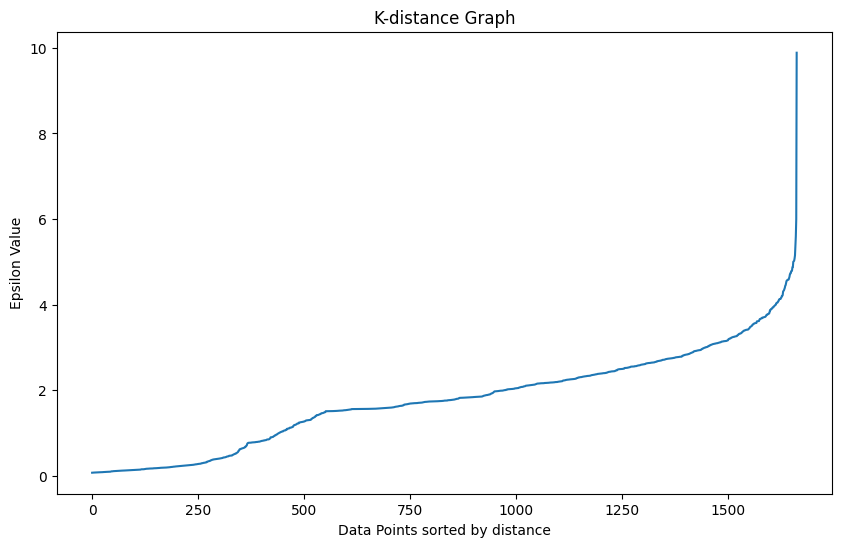

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

X = df[x_cols]

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

nn = NearestNeighbors(n_neighbors = 20)
neighbors = nn.fit(scaled_x)
distances, indices = neighbors.kneighbors(scaled_x)

# Sorting the distances and taking the distance to the 10th nearest neighbor (index 9)
distances = np.sort(distances, axis=0)
distances = distances[:,19] # Select the distance to the 10th nearest neighbor

# k-distance graph
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon Value')
plt.show()

In [ ]:
# Generic
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, davies_bouldin_score, silhouette_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.ensemble import RandomForestRegressor
# Keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.losses import mean_squared_error
from keras.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.


In [ ]:
from typing import List, Tuple
def kmeans_analysis(df: pd.DataFrame, feature_names: List[str], cluster_range:Tuple[int, int], scale:str ='MinMaxScaler'):
    """Performs KMeans Clustering Analysis and plots cluster count vs inertia graph

    Args:
        df (pd.DataFrame): Dataset
        feature_names (List[str]): Input feature names
        cluster_range (Tuple[int, int]): Minimum and Maximum number of cluster
        scale (str) = 'MinMaxScaler': Type of scaler
                        1. 'MinMaxScaler' (Default): Scales between 0 and 1
                        2. 'StandardScaler': Scales for mean of zero and unit deviation

    Returns:
        Tuple(List[float], List[float], List[float], List[float]): Collection of (number of clusters, inertia, davies bouldin score, silhouette score)
    """
    x = df[feature_names]
    scaler = None
    if scale == 'MinMaxScaler':
        scaler = MinMaxScaler()
    elif scale == 'StandardScaler':
        scaler = StandardScaler()
    else:
        raise TypeError('Invalid scale argument, use MinMaxScaler or StandardScaler')
    
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    
    
    k_col, inertia_col, db_score_col, s_score_col = [],[],[],[]
    
    for i in range(cluster_range[0], cluster_range[1]):
        kmean = KMeans(n_clusters=i)
        kmean.fit(x_scaled)
        inertia = kmean.inertia_
        k_col.append(i)
        inertia_col.append(inertia)
        if i == 1:
            db_score_col.append(0)
            s_score_col.append(0)
        else:
            cluster_label_pred = kmean.predict(x_scaled)
            db_score_col.append(davies_bouldin_score(x_scaled, cluster_label_pred))
            s_score_col.append(silhouette_score(x_scaled, cluster_label_pred))
        
        print(f'Davies Boulding Score: ', db_score_col[-1], ' Silhouette Score: ', s_score_col[-1])
            
        
    plt.figure(figsize=(8, 6))
    plt.plot(k_col, inertia_col, marker='o', linestyle='--')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow method for Optimal k')
    plt.grid(True)
    plt.show()
    return (k_col, inertia_col, db_score_col, s_score_col)

Davies Boulding Score:  2.9726694563042053  Silhouette Score:  0.10618404977224967
Davies Boulding Score:  2.157928487703171  Silhouette Score:  0.18649456633319486
Davies Boulding Score:  1.96133974739432  Silhouette Score:  0.1652265210090378
Davies Boulding Score:  1.9278304171375722  Silhouette Score:  0.14632065229521649
Davies Boulding Score:  1.8554378439634405  Silhouette Score:  0.1291890799782055
Davies Boulding Score:  1.7086709736094694  Silhouette Score:  0.14635156590454387
Davies Boulding Score:  1.7399145291621867  Silhouette Score:  0.1628559463717782
Davies Boulding Score:  1.5435364725515153  Silhouette Score:  0.17812866687978848
Davies Boulding Score:  1.4866035890989195  Silhouette Score:  0.18035135848685543
Davies Boulding Score:  1.5188713907949007  Silhouette Score:  0.18185232253893654
Davies Boulding Score:  1.7890940905388641  Silhouette Score:  0.17062294716363885
Davies Boulding Score:  1.7435641097106365  Silhouette Score:  0.18387328128780003
Davies Bou

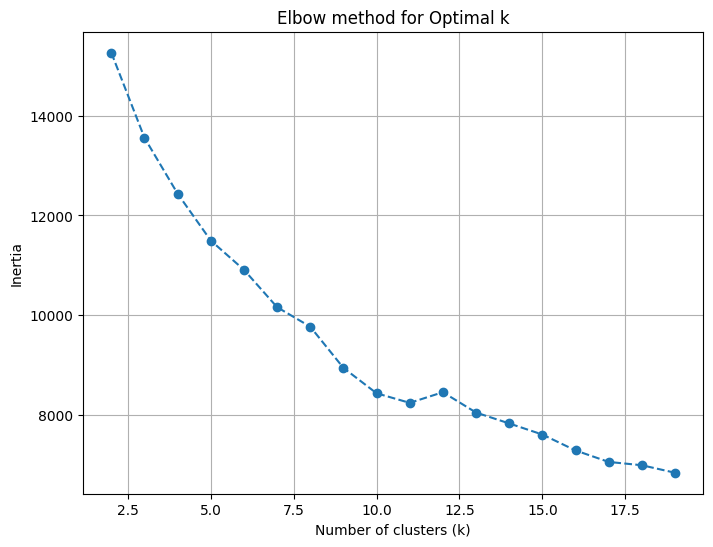

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [15262.34814272909,
  13556.403259752746,
  12435.920580913675,
  11496.476445499584,
  10910.301226764519,
  10161.138092810983,
  9769.808515280163,
  8944.700054871375,
  8435.367755985928,
  8243.19823262565,
  8456.77298777407,
  8048.985883756897,
  7830.754233402393,
  7608.721880632892,
  7289.50185926634,
  7059.365361213638,
  6993.02016595306,
  6842.84558269762],
 [2.9726694563042053,
  2.157928487703171,
  1.96133974739432,
  1.9278304171375722,
  1.8554378439634405,
  1.7086709736094694,
  1.7399145291621867,
  1.5435364725515153,
  1.4866035890989195,
  1.5188713907949007,
  1.7890940905388641,
  1.7435641097106365,
  1.6477121318914816,
  1.6390261594681825,
  1.632935770869783,
  1.5545895869581625,
  1.726623978564317,
  1.5881094571779315],
 [0.10618404977224967,
  0.18649456633319486,
  0.1652265210090378,
  0.14632065229521649,
  0.1291890799782055,
  0.14635156590454387,
  0.1628559463717782,
  0.

In [ ]:
kmeans_analysis(df, x_cols, (2, 20), scale='StandardScaler')

In [ ]:
# Optimal number of clusters is 6
x = df[x_cols]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=6)
kmeans.fit(x_scaled)
cluster_label_pred = kmeans.predict(x_scaled)
cluster_label_pred

array([2, 1, 0, ..., 2, 1, 2])

In [ ]:
df['cluster'] = cluster_label_pred
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,cluster
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,2
1,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,2,E01013325,13325,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e,1
2,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,2,E01012788,12788,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f,0
3,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,2,E01013220,13220,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae,4
4,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,...,2,E01012817,12817,E01012817,Kingston upon Hull 016D,Kingston upon Hull 016D,1.798393e+06,7836.548217,d1883eb3-b8e3-47f3-97ab-f33ce4bad217,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,2,E01013239,13239,E01013239,North Lincolnshire 017B,North Lincolnshire 017B,3.645705e+05,3835.509097,f9df9735-3f91-46b1-96ed-bddd8337206e,1
1659,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,2,E01013041,13041,E01013041,East Riding of Yorkshire 019D,East Riding of Yorkshire 019D,4.599030e+05,4327.334757,80efa4da-1f35-44af-bf79-e1b249abd36a,2
1660,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,2,E01012907,12907,E01012907,Kingston upon Hull 007C,Kingston upon Hull 007C,3.068800e+05,5060.119033,ff29fd97-5f74-49ae-a980-642ce2289379,2
1661,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,1,E01013286,13286,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca,1


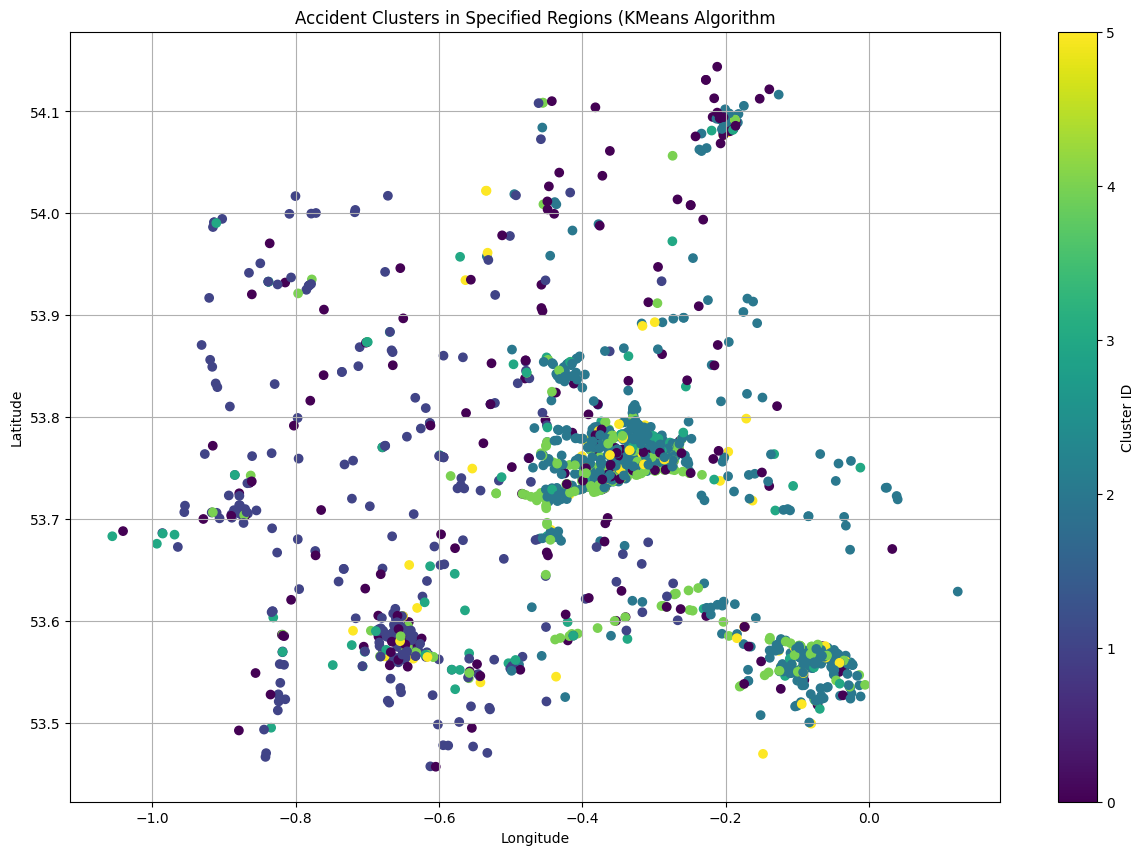

In [ ]:
# plot clusters using matplotlib
plt.figure(figsize=(15, 10))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('Accident Clusters in Specified Regions (KMeans Algorithm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
def dbscan_analysis(df: pd.DataFrame, feature_names: List[str], eps:float = 0.2, min_samples:int = 4, scaler:str = 'MinMaxScaler'):
    """Performs DBSCAN Clustering Analysis

    Args:
        df (pd.DataFrame): Dataset
        feature_names (List[str]): Input feature names
        eps (float) = 0.2: Maximum distance between two samples for one to be considered a neighborhood
        min_samples (int) = 4: Number of samples in a neighborhood for a point to be considered as a core point
        scale (str) = 'MinMaxScaler': Type of scaler
                        1. 'MinMaxScaler' (Default): Scales between 0 and 1
                        2. 'StandardScaler': Scales for mean of zero and unit deviation
    """
    x = df[feature_names]
    scale = None
    if scaler == 'MinMaxScaler':
        scale = MinMaxScaler()
    elif scaler == 'StandardScaler':
        scale = StandardScaler()
    else:
        raise TypeError('Invalid scale argument, use MinMaxScaler or StandardScaler')
    
    scale.fit(x)
    x_scaled = scale.transform(x)

    db_scan = DBSCAN(eps=0.2, min_samples=min_samples)
    db_scan_pred = db_scan.fit_predict(x_scaled)
    db_score = davies_bouldin_score(x_scaled, db_scan_pred)
    s_score = silhouette_score(x_scaled, db_scan_pred)

    print(f'Davies Bouldin Score: {db_score} | Silhouette Score: {s_score}')

In [ ]:
dbscan_analysis(df, x_cols, scaler='StandardScaler', min_samples=5)

Davies Bouldin Score: 1.4128906825478362 | Silhouette Score: -0.0899573830743474


In [ ]:
db_scan = DBSCAN(eps=0.2, min_samples=5)
db_scan_pred = db_scan.fit_predict(x_scaled)
db_scan_pred

array([ 0, -1, -1, ...,  2, -1,  3], dtype=int64)

In [ ]:
df['db_scan_cluster'] = db_scan_pred

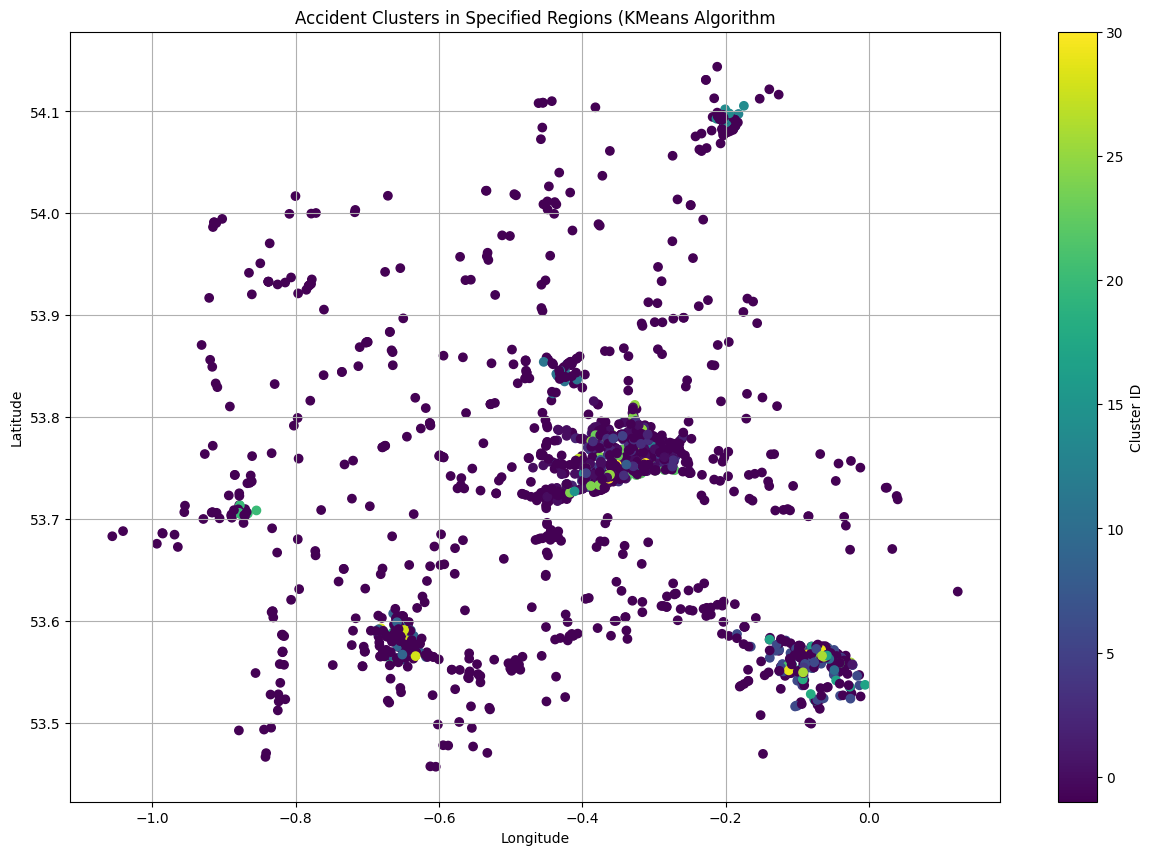

In [ ]:
# plot clusters using matplotlib
plt.figure(figsize=(15, 10))
plt.scatter(df['longitude'], df['latitude'], c=df['db_scan_cluster'], cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('Accident Clusters in Specified Regions (KMeans Algorithm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## 6. Choose three policing areas by filtering the data using the 'police_force' column, then create time series models to predict weekly accident counts for the upcoming year based on historical data from 2017 to 2019.

In [ ]:
query = """
    SELECT date, accident_index, police_force
    FROM accident
    WHERE police_force IN (11, 12, 13)
    AND accident_year BETWEEN 2017 AND 2019;
"""

In [ ]:
df = None
with sqlite3.connect(database_filepath) as conn:
    df = pd.read_sql_query(query, conn)

df

,date,accident_index,police_force
0,11/01/2017,2017110146070,11
1,01/01/2017,2017110147315,11
2,01/01/2017,2017110147443,11
3,01/01/2017,2017110147559,11
4,02/01/2017,2017110147732,11
...,...,...,...
19819,30/12/2019,2019136CU1382,13
19820,31/12/2019,2019136CV0708,13
19821,31/12/2019,2019136CV0723,13
19822,31/12/2019,2019136CV1518,13


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df

,date,accident_index,police_force
0,2017-01-11,2017110146070,11
1,2017-01-01,2017110147315,11
2,2017-01-01,2017110147443,11
3,2017-01-01,2017110147559,11
4,2017-01-02,2017110147732,11
...,...,...,...
19819,2019-12-30,2019136CU1382,13
19820,2019-12-31,2019136CV0708,13
19821,2019-12-31,2019136CV0723,13
19822,2019-12-31,2019136CV1518,13


In [ ]:
# df.set_index('date', inplace=True)
# weekly_accidents = (
#     df.groupby('police_force')
#     .resample('W')
#     .size()
#     .reset_index(name='weekly_accident_count')
# )

In [ ]:
## Set 'date' as index
df.set_index('date', inplace=True)
 
# Aggregate weekly accident counts
weekly_accidents_s = df.groupby(['police_force']).resample('W').size().unstack(level=0)
 
weekly_accidents_s = df.resample('W').size().reset_index(name = 'accident_count')
 
# Set 'date' as index
weekly_accidents_s.set_index('date', inplace=True)
 
# remove last row which represnets first week in 2020
weekly_accidents_s = weekly_accidents_s[:-1]

# Display DataFrame
weekly_accidents_s

C:\Users\929387\AppData\Local\Temp\ipykernel_25172\3349950610.py:5: DeprecationWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_accidents_s = df.groupby(['police_force']).resample('W').size().unstack(level=0)


,accident_count
date,
2017-01-01,15
2017-01-08,116
2017-01-15,140
2017-01-22,141
2017-01-29,139
...,...
2019-12-01,122
2019-12-08,115
2019-12-15,132


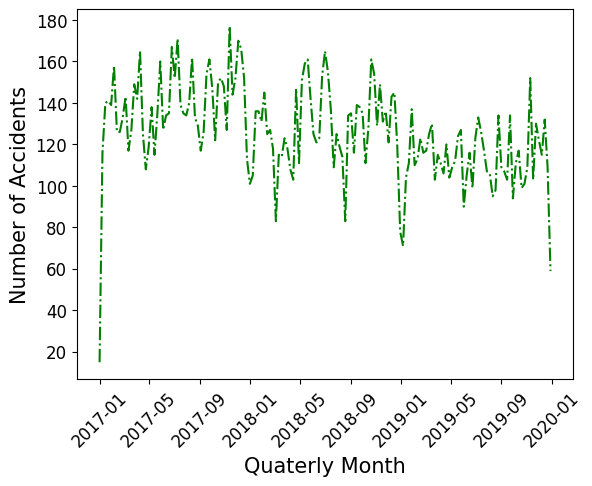

In [ ]:
# Visualisation of the data
plt.plot(weekly_accidents_s.index, weekly_accidents_s['accident_count'], 'g-.')

# Adding labels and title
plt.xlabel('Quaterly Month', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)

# Formatting the ticks on x and y axis
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

#### Decompose Time Series

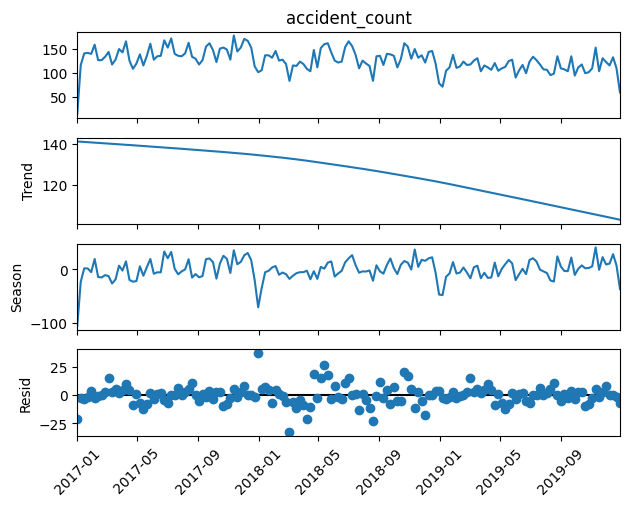

In [ ]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

STL(weekly_accidents_s['accident_count']).fit().plot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Testing the differenced series for stationarity
ADF_test = adfuller(weekly_accidents_s)[:2]

print(f"ADF Statistic: {ADF_test[0]}; p-value {ADF_test[1]}")

ADF Statistic: -8.24835045648898; p-value 5.475999148238464e-13


The p-value is less than 0.05. Hence, we reject the null hypothesis of non-stationarity.

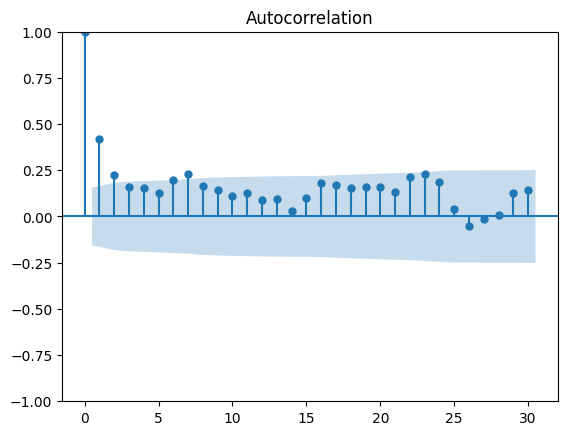

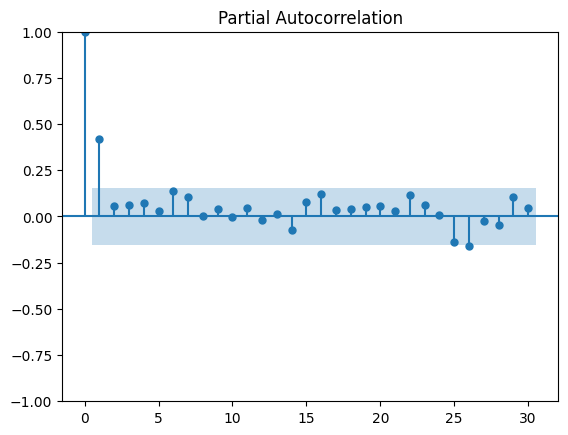

In [ ]:
# Plot of ACF to understand the series 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weekly_accidents_s, lags=30)
plot_pacf(weekly_accidents_s, lags=30)
plt.show()

**Remember:** 

ACF Cutoff, PACF Decay: Suggests an MA process


PACF Cutoff, ACF Decay: Suggests an AR process


Both ACF and PACF Decay: Suggests a mixed ARMA process

In [ ]:
# Specifying a range of parameters to determine the order using AIC
from itertools import product
ps = np.arange(0,10,1) # Order of AR
qs = np.arange(0,10,1) # Order of MA
Ps = [0] # Seasonal order of AR (taught in week 7)
Qs = [0] # Seasonal order of MA (taught in week 7)
d=0 # two-order differencing
D = 0 # Seasonal differencing (taught in week 7)
s= 52 # period
p_q_list = list(product(ps,qs,Ps,Qs))
p_q_list[:5]

[(0, 0, 0, 0), (0, 1, 0, 0), (0, 2, 0, 0), (0, 3, 0, 0), (0, 4, 0, 0)]

In [ ]:
train_s = weekly_accidents_s[['accident_count']][:len(weekly_accidents_s) - 28]
test_s = weekly_accidents_s[['accident_count']][-28:]
import warnings
warnings.filterwarnings("ignore") #ignoring the warnings
from tqdm import tqdm # to show progress bar
# Function to plot the aic
def aic_values(target):
    
    """This functions accepts a series and returns the aic values"""
    list_of_aic = []

    for order in tqdm(p_q_list):
        try:
            model = SARIMAX(endog=target, order=(order[0], d, order[1]),
            seasonal_order=(order[2], D, order[2], s), simple_differencing=False).fit(disp=False)  #fitting the model for all values of p and q
        except:
            continue #skipping where model fails to fit. Just to showcase error handling, not recommended. Try to find the specific errors and then resolve the issue. 

        list_of_aic.append([order, model.aic]) #model.aic returns the AIC value for the specific model. The list_of_aic is storing all the AIC values for their models (represented by orders)
        
    aic_df = pd.DataFrame(list_of_aic, columns = ['Order(p,q,Ps,QS)','AIC']) #converting list to a dataframe
    aic_df.sort_values(by='AIC', ascending=True, inplace=True)#.reset_index(drop=True) #sorting the AIC values in incremental order, because we want the model with lowest AIC value.
    return aic_df

# only find the AIC values on train data. If test data used, the problem of data leakage occurs.
aic_df = aic_values(train_s)

NameError: name 'weekly_accidents' is not defined